<a href="https://colab.research.google.com/github/georgesteve/Research-Assitant-ML-ROJ/blob/main/Lectura_TEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving jica_210102.dat.txt to jica_210102.dat.txt


In [ ]:
ls

jica_210102.dat  sample_data/


In [2]:
import numpy as np
import datetime
import pandas as pd

path='jica_210102.dat.txt'

TEC=[]
f = open(path, 'r')
            # Read and ignore header lines
line1 = f.readline()
line2 = f.readline()
line3 = f.readline()
line4 =f.readline()
line5 =f.readline()
line5 =line5.split()
año,mes,dia=line5[0],line5[1],line5[2]
print(año,mes,dia)
print(len(line5))
# Loop over lines and extract variables of interest
for line in f:
    line = line.strip()
    columns = line.split()
    if len(columns) < 4:
      PRN=columns[2]
      #print(PRN)
    else:
      c=columns[2:]
      c.append(PRN)
      c.append(año)
      c.append(mes)
      c.append(dia)
      TEC.append(c)
      #print(len(columns))
df=pd.DataFrame(TEC,columns=['Hora','Minuto','Segundo','TEC','b','c','d','e','f','g','PRN','Año','Mes','Día'])    

2021 1 2
3


In [3]:
print(df)

      Hora Minuto Segundo     TEC       b  ...        g   PRN   Año Mes Día
0       19      0      20  40.180  13.193  ...  254.484  1798  2021   1   2
1       19      0      30  40.182  13.196  ...  254.412  1798  2021   1   2
2       19      0      40  40.197  13.200  ...  254.339  1798  2021   1   2
3       19      0      50  40.238  13.203  ...  254.267  1798  2021   1   2
4       19      1       0  40.250  13.207  ...  254.195  1798  2021   1   2
...    ...    ...     ...     ...     ...  ...      ...   ...   ...  ..  ..
16084   21     13      30  38.980  16.518  ...  140.429   804  2021   1   2
16085   21     13      40  39.003  16.522  ...  140.456   804  2021   1   2
16086   21     13      50  38.982  16.525  ...  140.482   804  2021   1   2
16087   21     14       0  39.026  16.529  ...  140.508   804  2021   1   2
16088   21     14      10  38.985  16.533  ...  140.534   804  2021   1   2

[16089 rows x 14 columns]


In [19]:
g = df.groupby('PRN')
#g.groups.keys()
type(list(g.groups)[1]) # or this

str

In [ ]:
df['Color'].unique()

In [29]:
g.get_group(list(g.groups)[1])['TEC']
g.get_group(list(g.groups)[1]).index

Int64Index([3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605,
            ...
            4966, 4967, 4968, 4969, 4970, 4971, 4972, 4973, 4974, 4975],
           dtype='int64', length=1380)

In [14]:
groups = [name for name,unused_df in g]
print(groups)

['1331', '1380', '1784', '1798', '245', '276', '379', '478', '576', '756', '804', '888']


In [32]:
for  j in list(g.groups):
  print(j)
  x=g.get_group(list(g.groups)[j])

1331


TypeError: ignored

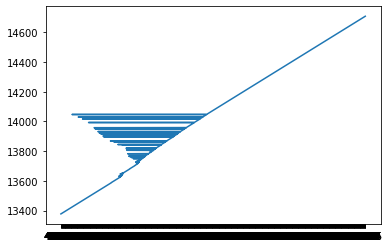

In [34]:
from numpy import *
import math
import matplotlib.pyplot as plt

g = df.groupby('PRN')
#g.groups.keys()
for  j in range(len(list(g.groups)))):
  x=g.get_group(list(g.groups)[j])['TEC']
  y=g.get_group(list(g.groups)[j]).index
  plt.plot(x,y) # plotting t, a separately 

plt.show()

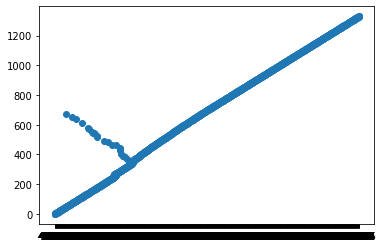

In [37]:

x=g.get_group(list(g.groups)[0])['TEC']
y=range(len(g.get_group(list(g.groups)[0])))

plt.scatter(x,y) # plotting t, a separately 

In [ ]:
df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import datetime

## function to read Hs or Delta of Hs
def read_H(INDIR_deltajp):
    deltaH_unix=[]
    deltaH=[]
    for i, fn in enumerate(sorted(INDIR_deltajp)):
        num_lines = sum(1 for line in open(fn))
        if num_lines>5:## data con menos de 6 lineas no tiene data
            f = open(fn, 'r')
            # Read and ignore header lines
            line1 = f.readline()
            line2 = f.readline()
            header = f.readline()
            line4 =f.readline()
            # Loop over lines and extract variables of interest
            for line in f:
                line = line.strip()
                columns = line.split()
                dt = datetime.datetime(year=int(columns[2]), month=int(columns[1]), day=int(columns[0]))
                deltaH_unix.append(calendar.timegm(dt.timetuple())+60*60*int(columns[3])+60*int(columns[4]))#
                deltaH.append(float(columns[6]))

            f.close()
        else:
            pass
    deltaH_unix=np.array(deltaH_unix)
    deltaH=np.array(deltaH)
    
    return deltaH_unix,deltaH
INDIR_deltajp="ruta_de la caroeta_donde_Estan_los_archivos_ascii"
deltaH_unix,deltaH=read_H(INDIR_deltajp)

In [ ]:
import numpy as np
import datetime

## function to read Hs or Delta of Hs
def read_H(INDIR_deltajp):
    deltaH_unix=[]
    deltaH=[]
    for i, fn in enumerate(sorted(INDIR_deltajp)):
        num_lines = sum(1 for line in open(fn))
        if num_lines>5:## data con menos de 6 lineas no tiene data
            f = open(fn, 'r')
            # Read and ignore header lines
            line1 = f.readline()
            line2 = f.readline()
            header = f.readline()
            line4 =f.readline()
            # Loop over lines and extract variables of interest
            for line in f:
                line = line.strip()
                columns = line.split()
                dt = datetime.datetime(year=int(columns[2]), month=int(columns[1]), day=int(columns[0]))
                deltaH_unix.append(calendar.timegm(dt.timetuple())+60*60*int(columns[3])+60*int(columns[4]))#
                deltaH.append(float(columns[6]))

            f.close()
        else:
            pass
    deltaH_unix=np.array(deltaH_unix)
    deltaH=np.array(deltaH)
    
    return deltaH_unix,deltaH
INDIR_deltajp="ruta_de la caroeta_donde_Estan_los_archivos_ascii"
deltaH_unix,deltaH=read_H(INDIR_deltajp)

In [ ]:
from google.colab import drive


In [ ]:
print(type(uploaded))

<class 'dict'>


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(uploaded)

ValueError: ignored

In [ ]:
import requests as rq
import pandas as pd
import json

dfs = []

with open('tfl_list_stops.txt', encoding='utf-8') as file:
    file_list = [line.strip() for line in file]


TypeError: ignored

In [ ]:
dir(uploaded) 

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [ ]:
type(uploaded.values())

dict_values

In [ ]:
uploaded.items

<function dict.items>

In [ ]:
 q = type('allMyFields', (object,), uploaded)

In [ ]:
v = list(uploaded.values())


b'         HUANCAYO, Peru\n     -12.0424     -75.3214    3321.0000\nNOV GSV4004B\nRINEX\n 2017    2   17\nPRN       1   1142\n    1    0   0   0   0   19.183   -4.964   64.659  -13.163  -74.456   20.958  143.084\n    2    0   0   0  10   19.349   -4.961   64.702  -13.158  -74.454   21.133  142.900\n    3    0   0   0  20   19.232   -4.958   64.746  -13.154  -74.453   20.999  142.717\n    4    0   0   0  30   19.212   -4.955   64.790  -13.149  -74.452   20.970  142.533\n    5    0   0   0  40   19.204   -4.952   64.833  -13.144  -74.450   20.955  142.349\n    6    0   0   0  50   19.146   -4.949   64.877  -13.139  -74.449   20.885  142.165\n    7    0   0   1   0   19.074   -4.947   64.921  -13.134  -74.448   20.800  141.981\n    8    0   0   1  10   18.956   -4.944   64.964  -13.129  -74.446   20.665  141.797\n    9    0   0   1  20   18.995   -4.941   65.008  -13.125  -74.445   20.701  141.613\n   10    0   0   1  30   19.171   -4.938   65.052  -13.120  -74.444   20.886  141.429\n   1

In [ ]:
print(v[0][:52])

b'         HUANCAYO, Peru\n     -12.0424     -75.3214  '


In [ ]:
print(list(uploaded))

['lhyo_170217.dat']


In [ ]:
+import gzip
import shutil
with gzip.open('file.txt.gz', 'rb') as f_in:
    with open('file.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)